In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
file=pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S02W4953_hour.csv',header=0,delimiter='\t')
file.head()

,datetime,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
0,2017-07-05 11:00:00,1470.556030,1389.960327,1475.128052,599.853027,0.000000,1604.250000,1238.140991,0.060059,294.700002,...,1018.250000,516.166667,0.0,6.037200,22.816667,24.983333,15.716667,63.833333,34483.333333,2.833333
1,2017-07-05 12:00:00,1470.556152,1391.007935,1475.128052,599.853027,14.714286,596.379700,1238.201050,0.060059,300.549998,...,1018.233337,662.666667,0.0,6.960717,23.466667,25.400000,15.633334,61.166667,33350.000000,2.000000
2,2017-07-05 13:00:00,1470.579590,1391.560547,1475.128052,599.853027,11.562675,801.231201,1238.204956,0.003906,285.750000,...,1018.216675,694.500000,0.0,5.372850,23.983333,26.283333,15.466667,58.500000,36666.666667,1.666667
3,2017-07-05 14:00:00,1470.579956,1392.567749,1475.128052,599.853027,0.089636,960.882324,1238.204956,0.000000,294.550003,...,1018.250000,812.666667,0.0,9.047567,24.233333,27.116667,15.483333,57.833333,35400.000000,1.666667
4,2017-07-05 15:00:00,1470.581055,1393.423828,1475.128052,599.853027,0.000000,837.653625,1238.208984,0.004028,311.250000,...,1018.366669,811.000000,0.0,9.430167,23.950000,26.583334,14.983333,56.833333,35000.000000,1.500000


In [2]:
GP = file['gasPower'].iloc[3200:3272]
Q = file['Q'].iloc[3200:3272]
T = file['T'].iloc[3200:3272]
datetime = file['datetime'].iloc[3200:3272]

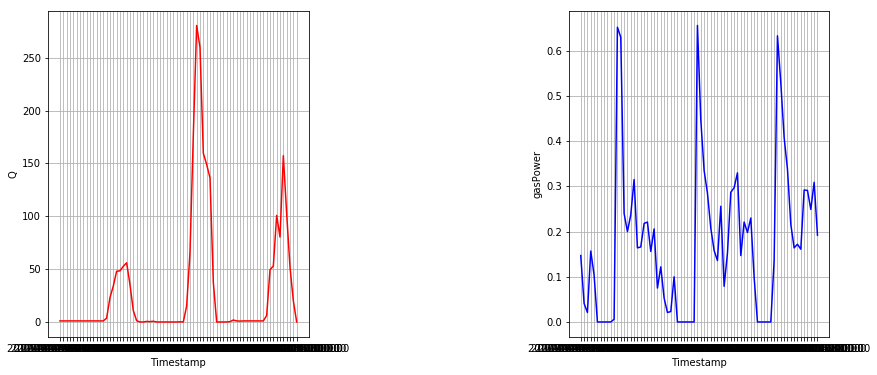

In [6]:
fig = plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(datetime,Q,'r')
plt.grid(True)
plt.ylabel('Q')
plt.xlabel('Timestamp')

plt.subplot(1, 2, 2)
plt.plot(datetime, GP,'b')
plt.grid(True)
plt.xlabel('Timestamp')
plt.ylabel('gasPower')

fig.subplots_adjust(wspace=1)
plt.show()

In [4]:
slope,intercept, r_value,p_value, std_err=stats.linregress(Q,GP)

print('R-SQUARED Q/Gp:\n'+str((r_value**2)*100)+'%')


R-SQUARED Q/Gp:
0.490889371593%


In [5]:
slope,intercept, r_value,p_value, std_err=stats.linregress(T,GP)

print('R-SQUARED T/Gp:\n'+str((r_value**2)*100)+'%')


R-SQUARED T/Gp:
1.69782829446%
